In [9]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
import sys
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import preprocessing
import urllib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import geopandas as gpd
import pyogrio
from shapely.geometry import Point
from shapely import wkt

# To ignore some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [10]:
gdf = pyogrio.read_dataframe('tl_2023_36_tract/tl_2023_36_tract.shx')

### Population Data by census tract

In [11]:
Cenpop = gpd.read_file('nyc_decennialcensusdata_2010_2020_change-core-geographies.csv')

In [12]:
Cenpop['GeoID'] = Cenpop['GeoID'].astype(str)

In [13]:
gdf

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,36,093,033102,36093033102,1400000US36093033102,331.02,Census Tract 331.02,G5020,S,183329990,3232878,+42.7780248,-074.1727005,"POLYGON ((-74.30655 42.75064, -74.30625 42.751..."
1,36,093,020102,36093020102,1400000US36093020102,201.02,Census Tract 201.02,G5020,S,854905,0,+42.8295375,-073.9161408,"POLYGON ((-73.92513 42.82029, -73.92440 42.821..."
2,36,093,032504,36093032504,1400000US36093032504,325.04,Census Tract 325.04,G5020,S,65999125,1264687,+42.9010539,-074.0288936,"POLYGON ((-74.09298 42.95587, -74.08805 42.955..."
3,36,081,003400,36081003400,1400000US36081003400,34,Census Tract 34,G5020,S,213987,0,+40.6847731,-073.8581871,"POLYGON ((-73.86629 40.68319, -73.86549 40.683..."
4,36,081,003900,36081003900,1400000US36081003900,39,Census Tract 39,G5020,S,146970,0,+40.7627994,-073.9409316,"POLYGON ((-73.94330 40.76066, -73.94247 40.761..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,36,027,130004,36027130004,1400000US36027130004,1300.04,Census Tract 1300.04,G5020,S,24394730,363637,+41.7909753,-073.8382016,"POLYGON ((-73.86601 41.81412, -73.86428 41.814..."
5407,36,027,050104,36027050104,1400000US36027050104,501.04,Census Tract 501.04,G5020,S,25421604,234551,+41.5929768,-073.7645636,"POLYGON ((-73.80389 41.58353, -73.80303 41.584..."
5408,36,119,014500,36119014500,1400000US36119014500,145,Census Tract 145,G5020,S,2716634,14648,+41.2850006,-073.9079663,"POLYGON ((-73.92411 41.27396, -73.92388 41.274..."
5409,36,061,016900,36061016900,1400000US36061016900,169,Census Tract 169,G5020,S,180002,0,+40.7851959,-073.9731196,"POLYGON ((-73.97644 40.78574, -73.97598 40.786..."


In [14]:
Cenpop = pd.merge(Cenpop, gdf[['GEOID', 'geometry']], left_on='GeoID', right_on='GEOID', how='left')

In [15]:
Cenpop

,Year,GeoType,Borough,GeoID,BCT2020,Name,CDType,NTAType,Pop1,Pop1P,...,Pop70t74P,Pop75t79,Pop75t79P,Pop80t84,Pop80t84P,Pop85pl,Pop85plP,geometry_x,GEOID,geometry_y
0,2020,CT2020,Bronx,36005000100,2000100,,,,"3,772",100.0,...,0.2,4,0.1,6,0.2,1,0.0,None,36005000100,"POLYGON ((-73.89772 40.79514, -73.89611 40.796..."
1,2020,CT2020,Bronx,36005000200,2000200,,,,"4,779",100.0,...,2.8,108,2.3,61,1.3,96,2.0,None,36005000200,"POLYGON ((-73.86648 40.80590, -73.86231 40.809..."
2,2020,CT2020,Bronx,36005000400,2000400,,,,"6,272",100.0,...,4.0,105,1.7,69,1.1,64,1.0,None,36005000400,"POLYGON ((-73.85960 40.81528, -73.85870 40.815..."
3,2020,CT2020,Bronx,36005001600,2001600,,,,"5,795",100.0,...,4.2,171,3.0,131,2.3,143,2.5,None,36005001600,"POLYGON ((-73.86246 40.81925, -73.86153 40.819..."
4,2020,CT2020,Bronx,36005001901,2001901,,,,"2,292",100.0,...,0.7,16,0.7,9,0.4,6,0.3,None,36005001901,"POLYGON ((-73.93180 40.80788, -73.93094 40.808..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,2020,CT2020,Staten Island,36085030302,5030302,,,,"6,669",100.0,...,3.6,137,2.1,50,0.7,59,0.9,None,36085030302,"POLYGON ((-74.16814 40.62208, -74.16793 40.622..."
2323,2020,CT2020,Staten Island,36085031901,5031901,,,,"3,262",100.0,...,2.1,41,1.3,25,0.8,17,0.5,None,36085031901,"POLYGON ((-74.16647 40.62852, -74.16645 40.629..."
2324,2020,CT2020,Staten Island,36085031902,5031902,,,,"5,500",100.0,...,1.9,56,1.0,39,0.7,36,0.7,None,36085031902,"POLYGON ((-74.17129 40.64052, -74.17118 40.641..."
2325,2020,CT2020,Staten Island,36085032300,5032300,,,,"1,233",100.0,...,1.8,28,2.3,17,1.4,29,2.4,None,36085032300,"POLYGON ((-74.19742 40.63592, -74.19739 40.635..."


In [16]:
Cenpop = gpd.GeoDataFrame(Cenpop, geometry='geometry_y').set_crs("EPSG:4269", inplace=True)

In [17]:
Cenpop.head()

,Year,GeoType,Borough,GeoID,BCT2020,Name,CDType,NTAType,Pop1,Pop1P,...,Pop70t74P,Pop75t79,Pop75t79P,Pop80t84,Pop80t84P,Pop85pl,Pop85plP,geometry_x,GEOID,geometry_y
0,2020,CT2020,Bronx,36005000100,2000100,,,,"3,772",100.0,...,0.2,4,0.1,6,0.2,1,0.0,None,36005000100,"POLYGON ((-73.89772 40.79514, -73.89611 40.796..."
1,2020,CT2020,Bronx,36005000200,2000200,,,,"4,779",100.0,...,2.8,108,2.3,61,1.3,96,2.0,None,36005000200,"POLYGON ((-73.86648 40.80590, -73.86231 40.809..."
2,2020,CT2020,Bronx,36005000400,2000400,,,,"6,272",100.0,...,4.0,105,1.7,69,1.1,64,1.0,None,36005000400,"POLYGON ((-73.85960 40.81528, -73.85870 40.815..."
3,2020,CT2020,Bronx,36005001600,2001600,,,,"5,795",100.0,...,4.2,171,3.0,131,2.3,143,2.5,None,36005001600,"POLYGON ((-73.86246 40.81925, -73.86153 40.819..."
4,2020,CT2020,Bronx,36005001901,2001901,,,,"2,292",100.0,...,0.7,16,0.7,9,0.4,6,0.3,None,36005001901,"POLYGON ((-73.93180 40.80788, -73.93094 40.808..."


### Legally opperating businesses in NYC

In [18]:
legal_opperate = pd.read_csv('https://data.cityofnewyork.us/api/views/w7w3-xahh/rows.csv?date=20231207&accessType=DOWNLOAD')

/var/folders/qp/9y56mfxx3zq2c_cjbvf9xg_w0000gn/T/ipykernel_96663/1129729009.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  legal_opperate = pd.read_csv('https://data.cityofnewyork.us/api/views/w7w3-xahh/rows.csv?date=20231207&accessType=DOWNLOAD')


In [19]:
#drop na where longtitude and latitude are na.
legal_opperate = legal_opperate.dropna(subset=['Longitude', 'Latitude'])


In [20]:
geometry = [Point(xy) for xy in zip(legal_opperate.Longitude, legal_opperate.Latitude)]
legal_opperate = gpd.GeoDataFrame(legal_opperate, geometry=geometry)

legal_opperate.set_crs("EPSG:4269", inplace=True)
legal_opperate.head()

,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,...,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location,geometry
18,0365714-DCA,Business,03/31/2005,Inactive,04/08/1997,Garage,THE GARDENS 75TH STREET OWNERS CORP.,NaN,3538,75TH ST,...,25.0,4029562,4012740020.0,QN28,289.0,"Vehicle Spaces: 85, Bicycle Spaces:",-73.891136,40.750745,"(40.75074488262595, -73.89113569640881)",POINT (-73.89114 40.75074)
19,1076184-DCA,Business,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",SUNRISE DELICATESSEN,2017,CHURCH AVE,...,40.0,3116556,3050810039.0,BK42,50801.0,NaN,-73.960737,40.650123,"(40.6501225946322, -73.96073707845565)",POINT (-73.96074 40.65012)
23,2061591-DCA,Business,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,NaN,6914,4TH AVE,...,43.0,3145701,3058720047.0,BK31,68.0,Laundry Type: Retail Laundry,-74.023621,40.634397,"(40.63439650603149, -74.02362065616948)",POINT (-74.02362 40.63440)
24,2009334-DCA,Business,05/23/2020,Inactive,06/09/2014,Sidewalk Cafe,DCB DELANCEY CORPORATION,SEL ROSE,1,DELANCEY ST,...,1.0,1005662,1004240012.0,MN27,18.0,Sidewalk Cafe Type: Regular Unenclosed/Small U...,-73.993820,40.720242,"(40.720241568328824, -73.99382027141543)",POINT (-73.99382 40.72024)
26,2038840-DCA,Business,07/31/2021,Inactive,06/09/2016,Secondhand Dealer - General,MD BROADWAY ELECTRONICS LLC,NaN,1888,JEROME AVE,...,14.0,2013962,2031790031.0,NaN,NaN,NaN,-73.906078,40.855206,"(40.85520587133494, -73.90607848934312)",POINT (-73.90608 40.85521)


### License application in NYC

In [21]:
license_appli = pd.read_csv('https://data.cityofnewyork.us/api/views/ptev-4hud/rows.csv?date=20231207&accessType=DOWNLOAD')

/var/folders/qp/9y56mfxx3zq2c_cjbvf9xg_w0000gn/T/ipykernel_96663/2915713197.py:1: DtypeWarning: Columns (20,24) have mixed types. Specify dtype option on import or set low_memory=False.
  license_appli = pd.read_csv('https://data.cityofnewyork.us/api/views/ptev-4hud/rows.csv?date=20231207&accessType=DOWNLOAD')


In [22]:
license_appli = license_appli.dropna(subset=['Longitude', 'Latitude'])

In [23]:
geometry = [Point(xy) for xy in zip(license_appli.Longitude, license_appli.Latitude)]
license_appli = gpd.GeoDataFrame(license_appli, geometry=geometry)

license_appli.set_crs("EPSG:4269", inplace=True)
license_appli.head()

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,Temp Op Letter Issued,Temp Op Letter Expiration,...,Unit,Description,City,State,Zip,Contact Phone,Longitude,Latitude,Active Vehicles,geometry
0,1066-2017-RHIC,1294131-DCA,Business,Renewal,PEYKO TZENOV,Issued,01/09/2017,01/10/2017,NaN,NaN,...,NaN,NaN,BRONX,NY,10467,9178047161,-73.877091,40.876214,NaN,POINT (-73.87709 40.87621)
1,7066-2014-ASLS,2009515-DCA,Business,Application,7TH AVE GOURMET INC.,Issued,06/02/2014,06/13/2014,NaN,NaN,...,NaN,NaN,NEW YORK,NY,10011,718-783-3806,-73.975088,40.674997,NaN,POINT (-73.97509 40.67500)
2,1164-2019-RDPD,1472251-DCA,Business,Renewal,AMERICAN EAST PHARMACY INC.,Issued,01/09/2019,01/10/2019,NaN,NaN,...,NaN,NaN,NEW YORK,NY,10002,2129251900,-73.996169,40.714118,NaN,POINT (-73.99617 40.71412)
3,33701-2016-RELE,2025971-DCA,Business,Renewal,LUCAS ELECTRONICS INC,Issued,12/31/2016,01/10/2017,NaN,NaN,...,NaN,NaN,BROOKLYN,NY,11222,347-987-3235,-73.954098,40.729869,NaN,POINT (-73.95410 40.72987)
4,34278-2018-RELE,2047043-DCA,Business,Renewal,ELITE WIRELESS GROUP NY LLC,Issued,12/31/2018,01/08/2019,NaN,NaN,...,NaN,NaN,BROOKLYN,NY,11226,718-484-7746,-73.949327,40.650826,NaN,POINT (-73.94933 40.65083)


### NYC subway station data:

In [24]:
Stations = pd.read_csv( 'https://raw.githubusercontent.com/CUSP2021ADS/Data/main/NYCSubwayNodes.csv' , index_col=None, header=0 )

In [25]:
geometry = [Point(xy) for xy in zip(Stations.long, Stations.lat)]
Stations = gpd.GeoDataFrame(Stations, geometry=geometry)

Stations.set_crs("EPSG:4269", inplace=True)
Stations.head()

,name,id,boro,lat,long,lines,geometry
0,Greenpoint Av,G26,Bk,40.731352,-73.954449,G,POINT (-73.95445 40.73135)
1,21 St,G24,Q,40.744065,-73.949724,G,POINT (-73.94972 40.74406)
2,Court Sq,G22,Q,40.746554,-73.943832,G,POINT (-73.94383 40.74655)
3,36 St,G20,Q,40.752039,-73.928781,M R,POINT (-73.92878 40.75204)
4,Queens Plaza,G21,Q,40.748973,-73.937243,E M R,POINT (-73.93724 40.74897)


### NYC Bus Station data

In [26]:
bus_data = pd.read_csv('https://data.cityofnewyork.us/api/views/t4f2-8md7/rows.csv?accessType=DOWNLOAD')

In [27]:
bus_data['geometry'] = bus_data['the_geom'].apply(wkt.loads)

In [28]:
bus_data = gpd.GeoDataFrame(bus_data, geometry='geometry')
bus_data.set_crs("EPSG:4269", inplace=True)
bus_data.head()

,the_geom,BoroCode,BoroName,BoroCD,CounDist,AssemDist,StSenDist,CongDist,Shelter_ID,Corner,On_Street,Cross_Stre,Longitude,Latitude,NTAName,FEMAFldz,FEMAFldT,HrcEvac,geometry
0,POINT (-73.94874357365637 40.64085475597672),3,Brooklyn,317,45,42,21,9,BR02218,SW,AV D,NOSTRAND AV,-73.948745,40.640863,East Flatbush-Erasmus,X,AREA OF MINIMAL FLOOD HAZARD,5.0,POINT (-73.94874 40.64085)
1,POINT (-74.02283555116742 40.6292447605423),3,Brooklyn,310,43,46,26,11,BR02219,SW,5 AV,BAY RIDGE PKWY,-74.022837,40.629253,Bay Ridge,X,AREA OF MINIMAL FLOOD HAZARD,NaN,POINT (-74.02284 40.62924)
2,POINT (-73.92467258003798 40.67375874807616),3,Brooklyn,308,41,55,20,9,BR02220,SE,ST MARKS AV,BUFFALO AV,-73.924674,40.673767,Crown Heights (North),X,AREA OF MINIMAL FLOOD HAZARD,NaN,POINT (-73.92467 40.67376)
3,POINT (-73.9401345806071 40.578033768126936),3,Brooklyn,315,48,45,23,8,BR02221,SW,ORIENTAL BLVD,MACKENZIE ST,-73.940136,40.578042,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,X,AREA OF MINIMAL FLOOD HAZARD,1.0,POINT (-73.94013 40.57803)
4,POINT (-73.93991658060635 40.57805676808165),3,Brooklyn,315,48,45,23,8,BR02222,SW,ORIENTAL BLVD,MACKENZIE ST,-73.939918,40.578065,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,X,AREA OF MINIMAL FLOOD HAZARD,1.0,POINT (-73.93992 40.57806)


### NYC parking lot 

In [29]:
parking_data = pd.read_csv('DOITT_PARKING_LOT_20240420.csv')

In [30]:
parking_data['geometry'] = parking_data['the_geom'].apply(wkt.loads)
parking_data = gpd.GeoDataFrame(parking_data, geometry='geometry')
parking_data.set_crs("EPSG:4269", inplace=True)
parking_data.head()

,the_geom,SOURCE_ID,FEAT_CODE,SUB_CODE,STATUS,SHAPE_Leng,SHAPE_Area,geometry
0,MULTIPOLYGON (((-73.97910559725612 40.69049642...,21500000001,5000,500000,Unchanged,778.318836,32676.073685,"MULTIPOLYGON (((-73.97911 40.69050, -73.97910 ..."
1,MULTIPOLYGON (((-73.97943374194773 40.69316130...,21500000002,5000,500000,Updated,3737.772791,108080.622252,"MULTIPOLYGON (((-73.97943 40.69316, -73.97944 ..."
2,MULTIPOLYGON (((-73.9832399249372 40.702812757...,21500000003,5000,500000,Unchanged,442.772495,5407.860486,"MULTIPOLYGON (((-73.98324 40.70281, -73.98325 ..."
3,MULTIPOLYGON (((-73.98189157977659 40.70310347...,21500000004,5000,500000,Unchanged,284.623893,4027.729151,"MULTIPOLYGON (((-73.98189 40.70310, -73.98190 ..."
4,MULTIPOLYGON (((-73.98594989444811 40.70232449...,21500000005,5000,500000,Unchanged,1567.687419,122903.007235,"MULTIPOLYGON (((-73.98595 40.70232, -73.98595 ..."


### Median income by census tract

In [31]:
median_income = pd.read_csv('censustract-medianhouseholdincome2022.csv')

In [32]:
median_income['Census Tract'] = median_income['Census Tract'].astype(str)

In [33]:
med_income = pd.merge(median_income, gdf[['GEOID', 'geometry']], left_on='Census Tract', right_on='GEOID', how='left')

In [34]:
gpd_med_income = gpd.GeoDataFrame(med_income, geometry='geometry')

#### Median Income w/ geometry

In [35]:
gpd_med_income.head()

,short_name,long_name,Census Tract,2009-2013,2014-2018,GEOID,geometry
0,hh_inc_med_adj,Median household income (2022$),36005041900,43887.524204,36984.666450,36005041900,"POLYGON ((-73.88527 40.87923, -73.88466 40.879..."
1,hh_inc_med_adj,Median household income (2022$),36005042000,36089.108199,42552.994051,36005042000,"POLYGON ((-73.86229 40.89261, -73.86220 40.892..."
2,hh_inc_med_adj,Median household income (2022$),36005042100,61363.318016,39472.449695,36005042100,"POLYGON ((-73.88705 40.88436, -73.88686 40.884..."
3,hh_inc_med_adj,Median household income (2022$),36005042200,61962.267279,52862.277148,36005042200,"POLYGON ((-73.85852 40.89134, -73.85813 40.892..."
4,hh_inc_med_adj,Median household income (2022$),36005042300,40694.738215,42457.789589,36005042300,"POLYGON ((-73.87977 40.87712, -73.87972 40.877..."


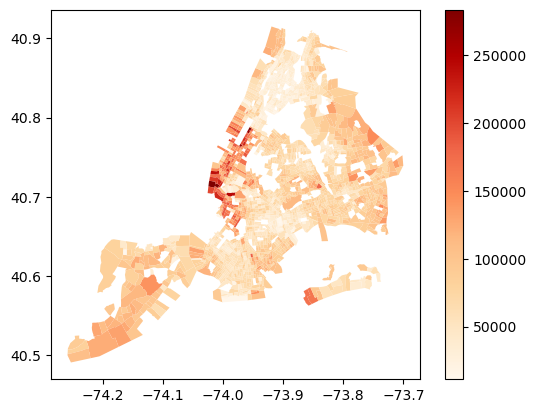

In [36]:
ax = gpd_med_income.plot(column='2014-2018', cmap='OrRd', legend=True)

# Show the plot
plt.show()

### join datasets: Legally opperating businesses in NYC & License application in NYC

In [37]:
legal_opperate.head()

,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,...,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location,geometry
18,0365714-DCA,Business,03/31/2005,Inactive,04/08/1997,Garage,THE GARDENS 75TH STREET OWNERS CORP.,NaN,3538,75TH ST,...,25.0,4029562,4012740020.0,QN28,289.0,"Vehicle Spaces: 85, Bicycle Spaces:",-73.891136,40.750745,"(40.75074488262595, -73.89113569640881)",POINT (-73.89114 40.75074)
19,1076184-DCA,Business,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",SUNRISE DELICATESSEN,2017,CHURCH AVE,...,40.0,3116556,3050810039.0,BK42,50801.0,NaN,-73.960737,40.650123,"(40.6501225946322, -73.96073707845565)",POINT (-73.96074 40.65012)
23,2061591-DCA,Business,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,NaN,6914,4TH AVE,...,43.0,3145701,3058720047.0,BK31,68.0,Laundry Type: Retail Laundry,-74.023621,40.634397,"(40.63439650603149, -74.02362065616948)",POINT (-74.02362 40.63440)
24,2009334-DCA,Business,05/23/2020,Inactive,06/09/2014,Sidewalk Cafe,DCB DELANCEY CORPORATION,SEL ROSE,1,DELANCEY ST,...,1.0,1005662,1004240012.0,MN27,18.0,Sidewalk Cafe Type: Regular Unenclosed/Small U...,-73.993820,40.720242,"(40.720241568328824, -73.99382027141543)",POINT (-73.99382 40.72024)
26,2038840-DCA,Business,07/31/2021,Inactive,06/09/2016,Secondhand Dealer - General,MD BROADWAY ELECTRONICS LLC,NaN,1888,JEROME AVE,...,14.0,2013962,2031790031.0,NaN,NaN,NaN,-73.906078,40.855206,"(40.85520587133494, -73.90607848934312)",POINT (-73.90608 40.85521)


In [38]:
license_appli.head()

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,Temp Op Letter Issued,Temp Op Letter Expiration,...,Unit,Description,City,State,Zip,Contact Phone,Longitude,Latitude,Active Vehicles,geometry
0,1066-2017-RHIC,1294131-DCA,Business,Renewal,PEYKO TZENOV,Issued,01/09/2017,01/10/2017,NaN,NaN,...,NaN,NaN,BRONX,NY,10467,9178047161,-73.877091,40.876214,NaN,POINT (-73.87709 40.87621)
1,7066-2014-ASLS,2009515-DCA,Business,Application,7TH AVE GOURMET INC.,Issued,06/02/2014,06/13/2014,NaN,NaN,...,NaN,NaN,NEW YORK,NY,10011,718-783-3806,-73.975088,40.674997,NaN,POINT (-73.97509 40.67500)
2,1164-2019-RDPD,1472251-DCA,Business,Renewal,AMERICAN EAST PHARMACY INC.,Issued,01/09/2019,01/10/2019,NaN,NaN,...,NaN,NaN,NEW YORK,NY,10002,2129251900,-73.996169,40.714118,NaN,POINT (-73.99617 40.71412)
3,33701-2016-RELE,2025971-DCA,Business,Renewal,LUCAS ELECTRONICS INC,Issued,12/31/2016,01/10/2017,NaN,NaN,...,NaN,NaN,BROOKLYN,NY,11222,347-987-3235,-73.954098,40.729869,NaN,POINT (-73.95410 40.72987)
4,34278-2018-RELE,2047043-DCA,Business,Renewal,ELITE WIRELESS GROUP NY LLC,Issued,12/31/2018,01/08/2019,NaN,NaN,...,NaN,NaN,BROOKLYN,NY,11226,718-484-7746,-73.949327,40.650826,NaN,POINT (-73.94933 40.65083)


In [39]:
Business = pd.merge(legal_opperate, license_appli, left_on='DCA License Number', right_on='License Number')

In [40]:
Business

,DCA License Number,License Type_x,License Expiration Date,License Status,License Creation Date,Industry,Business Name_x,Business Name 2,Address Building,Address Street Name,...,Unit,Description,City,State,Zip,Contact Phone,Longitude_y,Latitude_y,Active Vehicles,geometry_y
0,1076184-DCA,Business,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",SUNRISE DELICATESSEN,2017,CHURCH AVE,...,NaN,NaN,BROOKLYN,NY,11226,7189410211,-73.960737,40.650123,NaN,POINT (-73.96074 40.65012)
1,1076184-DCA,Business,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",SUNRISE DELICATESSEN,2017,CHURCH AVE,...,NaN,NaN,BROOKLYN,NY,11226.0,7189410211,-73.960737,40.650123,NaN,POINT (-73.96074 40.65012)
2,2061591-DCA,Business,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,NaN,6914,4TH AVE,...,NaN,NaN,BROOKLYN,NY,11209,212-233-7016,-74.023620,40.634397,NaN,POINT (-74.02362 40.63440)
3,2061591-DCA,Business,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,NaN,6914,4TH AVE,...,NaN,NaN,BROOKLYN,NY,11209,212-233-7016,-74.023620,40.634397,NaN,POINT (-74.02362 40.63440)
4,2009334-DCA,Business,05/23/2020,Inactive,06/09/2014,Sidewalk Cafe,DCB DELANCEY CORPORATION,SEL ROSE,1,DELANCEY ST,...,NaN,NaN,NEW YORK,NY,10002,NaN,-73.993820,40.720242,NaN,POINT (-73.99382 40.72024)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260755,1418198-DCA,Business,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,NaN,34,COFFEY ST,...,NaN,NaN,BROOKLYN,NY,11231,7183690271,-74.011547,40.674483,NaN,POINT (-74.01155 40.67448)
260756,1418198-DCA,Business,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,NaN,34,COFFEY ST,...,NaN,NaN,BROOKLYN,NY,11231,7183690271,-74.011547,40.674483,NaN,POINT (-74.01155 40.67448)
260757,1418198-DCA,Business,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,NaN,34,COFFEY ST,...,NaN,NaN,BROOKLYN,NY,11231,7183690271,-74.011547,40.674483,NaN,POINT (-74.01155 40.67448)
260758,1418198-DCA,Business,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,NaN,34,COFFEY ST,...,NaN,NaN,BROOKLYN,NY,11231,7183690271,-74.011547,40.674483,NaN,POINT (-74.01155 40.67448)


In [41]:
Business.to_csv('Business.csv', index=False)

In [42]:
drop = ['License Type_x','Business Name 2','Address Building','Secondary Address Street Name','Contact Phone Number','Address State','Borough Code','Community Board','Council District','BIN','BBL','NTA','Census Tract','Detail','Longitude_x','Latitude_x','Location','Application ID','License Number','License Type_y','Business Name_y','Application Category','Building Number','Street','Street 2','Unit Type','Unit','Description','City','State','Zip','Contact Phone','Longitude_y','Latitude_y','Active Vehicles','geometry_y']

In [43]:
Business_clean = Business.drop(drop, axis=1)

In [44]:
Business_clean.head()

,DCA License Number,License Expiration Date,License Status,License Creation Date,Industry,Business Name_x,Address Street Name,Address City,Address ZIP,Address Borough,geometry_x,Application or Renewal,Status,Start Date,End Date,Temp Op Letter Issued,Temp Op Letter Expiration,License Category
0,1076184-DCA,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",CHURCH AVE,BROOKLYN,11226,Brooklyn,POINT (-73.96074 40.65012),Renewal,Issued,12/03/2002,12/03/2002,NaN,NaN,Tobacco Retail Dealer
1,1076184-DCA,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",CHURCH AVE,BROOKLYN,11226,Brooklyn,POINT (-73.96074 40.65012),Application,Issued,04/02/2001,04/02/2001,NaN,NaN,Tobacco Retail Dealer
2,2061591-DCA,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,4TH AVE,BROOKLYN,11209,Brooklyn,POINT (-74.02362 40.63440),Renewal,Issued,11/27/2019,11/28/2019,NaN,NaN,Laundries
3,2061591-DCA,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,4TH AVE,BROOKLYN,11209,Brooklyn,POINT (-74.02362 40.63440),Application,Issued,11/20/2017,11/26/2017,NaN,NaN,Laundries
4,2009334-DCA,05/23/2020,Inactive,06/09/2014,Sidewalk Cafe,DCB DELANCEY CORPORATION,DELANCEY ST,NEW YORK,10002,Manhattan,POINT (-73.99382 40.72024),Renewal,Issued,12/14/2016,12/14/2016,NaN,NaN,Sidewalk Cafe


In [45]:
print(Business_clean.nunique())

DCA License Number           109173
License Expiration Date        1025
License Status                    2
License Creation Date          7009
Industry                         49
Business Name_x               83381
Address Street Name            5287
Address City                    352
Address ZIP                     411
Address Borough                  10
geometry_x                    56014
Application or Renewal            2
Status                            4
Start Date                     6402
End Date                       6476
Temp Op Letter Issued           367
Temp Op Letter Expiration       434
License Category                 49
dtype: int64


In [46]:
Business_clean['Status'].value_counts()

Issued       257428
Denied         2098
Pending        1052
Withdrawn       182
Name: Status, dtype: int64

##### Desciding the clustering factors by  
0: Denied or Withdrawn

1: Issued

In [47]:
Business_clean.loc[Business_clean['Status'] == 'Denied', 'Status'] = 0
Business_clean.loc[Business_clean['Status'] == 'Withdrawn', 'Status'] = 0
Business_clean.loc[Business_clean['Status'] == 'Issued', 'Status'] = 1


In [48]:
Business_clean

,DCA License Number,License Expiration Date,License Status,License Creation Date,Industry,Business Name_x,Address Street Name,Address City,Address ZIP,Address Borough,geometry_x,Application or Renewal,Status,Start Date,End Date,Temp Op Letter Issued,Temp Op Letter Expiration,License Category
0,1076184-DCA,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",CHURCH AVE,BROOKLYN,11226,Brooklyn,POINT (-73.96074 40.65012),Renewal,1,12/03/2002,12/03/2002,NaN,NaN,Tobacco Retail Dealer
1,1076184-DCA,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",CHURCH AVE,BROOKLYN,11226,Brooklyn,POINT (-73.96074 40.65012),Application,1,04/02/2001,04/02/2001,NaN,NaN,Tobacco Retail Dealer
2,2061591-DCA,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,4TH AVE,BROOKLYN,11209,Brooklyn,POINT (-74.02362 40.63440),Renewal,1,11/27/2019,11/28/2019,NaN,NaN,Laundries
3,2061591-DCA,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,4TH AVE,BROOKLYN,11209,Brooklyn,POINT (-74.02362 40.63440),Application,1,11/20/2017,11/26/2017,NaN,NaN,Laundries
4,2009334-DCA,05/23/2020,Inactive,06/09/2014,Sidewalk Cafe,DCB DELANCEY CORPORATION,DELANCEY ST,NEW YORK,10002,Manhattan,POINT (-73.99382 40.72024),Renewal,1,12/14/2016,12/14/2016,NaN,NaN,Sidewalk Cafe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260755,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,POINT (-74.01155 40.67448),Renewal,1,04/26/2018,05/18/2018,NaN,NaN,Tow Truck Company
260756,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,POINT (-74.01155 40.67448),Renewal,1,04/30/2014,06/12/2014,NaN,NaN,Tow Truck Company
260757,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,POINT (-74.01155 40.67448),Renewal,1,08/11/2021,09/27/2021,NaN,NaN,Tow Truck Company
260758,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,POINT (-74.01155 40.67448),Renewal,1,05/20/2022,05/20/2022,NaN,NaN,Tow Truck Company


In [49]:
data_train,data_test = train_test_split(Business_clean, test_size=0.33, random_state=99)

In [50]:
Cenpop

,Year,GeoType,Borough,GeoID,BCT2020,Name,CDType,NTAType,Pop1,Pop1P,...,Pop70t74P,Pop75t79,Pop75t79P,Pop80t84,Pop80t84P,Pop85pl,Pop85plP,geometry_x,GEOID,geometry_y
0,2020,CT2020,Bronx,36005000100,2000100,,,,"3,772",100.0,...,0.2,4,0.1,6,0.2,1,0.0,None,36005000100,"POLYGON ((-73.89772 40.79514, -73.89611 40.796..."
1,2020,CT2020,Bronx,36005000200,2000200,,,,"4,779",100.0,...,2.8,108,2.3,61,1.3,96,2.0,None,36005000200,"POLYGON ((-73.86648 40.80590, -73.86231 40.809..."
2,2020,CT2020,Bronx,36005000400,2000400,,,,"6,272",100.0,...,4.0,105,1.7,69,1.1,64,1.0,None,36005000400,"POLYGON ((-73.85960 40.81528, -73.85870 40.815..."
3,2020,CT2020,Bronx,36005001600,2001600,,,,"5,795",100.0,...,4.2,171,3.0,131,2.3,143,2.5,None,36005001600,"POLYGON ((-73.86246 40.81925, -73.86153 40.819..."
4,2020,CT2020,Bronx,36005001901,2001901,,,,"2,292",100.0,...,0.7,16,0.7,9,0.4,6,0.3,None,36005001901,"POLYGON ((-73.93180 40.80788, -73.93094 40.808..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,2020,CT2020,Staten Island,36085030302,5030302,,,,"6,669",100.0,...,3.6,137,2.1,50,0.7,59,0.9,None,36085030302,"POLYGON ((-74.16814 40.62208, -74.16793 40.622..."
2323,2020,CT2020,Staten Island,36085031901,5031901,,,,"3,262",100.0,...,2.1,41,1.3,25,0.8,17,0.5,None,36085031901,"POLYGON ((-74.16647 40.62852, -74.16645 40.629..."
2324,2020,CT2020,Staten Island,36085031902,5031902,,,,"5,500",100.0,...,1.9,56,1.0,39,0.7,36,0.7,None,36085031902,"POLYGON ((-74.17129 40.64052, -74.17118 40.641..."
2325,2020,CT2020,Staten Island,36085032300,5032300,,,,"1,233",100.0,...,1.8,28,2.3,17,1.4,29,2.4,None,36085032300,"POLYGON ((-74.19742 40.63592, -74.19739 40.635..."


In [51]:
Business_clean=gpd.GeoDataFrame(Business_clean, geometry='geometry_x')
Business_clean.set_crs("EPSG:4269", inplace=True)
Business_pop = gpd.sjoin(Business_clean, Cenpop, how='left', op='intersects')
columns_to_drop = ['Name', 'CDType', 'NTAType','Pop1P', 'Male', 'Male P', 'Fem', 'FemP', 'PopU5', 'PopU5P', 'Pop5t9', 'Pop5t9P', 'Pop10t14', 'Pop10t14P', 'Pop15t19', 'Pop15t19P', 'Pop20t24', 'Pop20t24P', 'Pop25t29', 'Pop25t29P', 'Pop30t34', 'Pop30t34P', 'Pop35t39', 'Pop35t39P', 'Pop40t44', 'Pop40t44P', 'Pop45t49', 'Pop45t49P', 'Pop50t54', 'Pop50t54P', 'Pop55t59', 'Pop55t59P', 'Pop60t64', 'Pop60t64P', 'Pop65t69', 'Pop65t69P', 'Pop70t74', 'Pop70t74P', 'Pop75t79', 'Pop75t79P', 'Pop80t84', 'Pop80t84P', 'Pop85pl', 'Pop85plP']
Business_pop = Business_pop.drop(columns=columns_to_drop)




In [52]:
Business_pop.columns

Index(['DCA License Number', 'License Expiration Date', 'License Status',
       'License Creation Date', 'Industry', 'Business Name_x',
       'Address Street Name', 'Address City', 'Address ZIP', 'Address Borough',
       'geometry_x_left', 'Application or Renewal', 'Status', 'Start Date',
       'End Date', 'Temp Op Letter Issued', 'Temp Op Letter Expiration',
       'License Category', 'index_right', 'Year', 'GeoType', 'Borough',
       'GeoID', 'BCT2020', 'Pop1', 'geometry_x_right', 'GEOID'],
      dtype='object')

In [54]:
Business_pop

,DCA License Number,License Expiration Date,License Status,License Creation Date,Industry,Business Name_x,Address Street Name,Address City,Address ZIP,Address Borough,...,License Category,index_right,Year,GeoType,Borough,GeoID,BCT2020,Pop1,geometry_x_right,GEOID
0,1076184-DCA,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",CHURCH AVE,BROOKLYN,11226,Brooklyn,...,Tobacco Retail Dealer,820.0,2020,CT2020,Brooklyn,36047050801,3050801,"4,311",None,36047050801
1,1076184-DCA,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",CHURCH AVE,BROOKLYN,11226,Brooklyn,...,Tobacco Retail Dealer,820.0,2020,CT2020,Brooklyn,36047050801,3050801,"4,311",None,36047050801
2,2061591-DCA,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,4TH AVE,BROOKLYN,11209,Brooklyn,...,Laundries,417.0,2020,CT2020,Brooklyn,36047006800,3006800,"5,491",None,36047006800
3,2061591-DCA,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,4TH AVE,BROOKLYN,11209,Brooklyn,...,Laundries,417.0,2020,CT2020,Brooklyn,36047006800,3006800,"5,491",None,36047006800
4,2009334-DCA,05/23/2020,Inactive,06/09/2014,Sidewalk Cafe,DCB DELANCEY CORPORATION,DELANCEY ST,NEW YORK,10002,Manhattan,...,Sidewalk Cafe,1183.0,2020,CT2020,Manhattan,36061001800,1001800,"7,934",None,36061001800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260755,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,...,Tow Truck Company,402.0,2020,CT2020,Brooklyn,36047005301,3005301,"2,164",None,36047005301
260756,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,...,Tow Truck Company,402.0,2020,CT2020,Brooklyn,36047005301,3005301,"2,164",None,36047005301
260757,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,...,Tow Truck Company,402.0,2020,CT2020,Brooklyn,36047005301,3005301,"2,164",None,36047005301
260758,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,...,Tow Truck Company,402.0,2020,CT2020,Brooklyn,36047005301,3005301,"2,164",None,36047005301


In [55]:
Business_pop=gpd.GeoDataFrame(Business_pop, geometry='geometry_x_left')
Business_pop.set_crs("EPSG:4269", inplace=True)
Business_pop=gpd.GeoDataFrame(Business_pop, geometry='geometry_x_left')
Business_pop.set_crs("EPSG:4269", inplace=True)
Business_pop=Business_pop.drop(columns=['index_right','GEOID'])

In [56]:
Business_pop

,DCA License Number,License Expiration Date,License Status,License Creation Date,Industry,Business Name_x,Address Street Name,Address City,Address ZIP,Address Borough,...,Temp Op Letter Issued,Temp Op Letter Expiration,License Category,Year,GeoType,Borough,GeoID,BCT2020,Pop1,geometry_x_right
0,1076184-DCA,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",CHURCH AVE,BROOKLYN,11226,Brooklyn,...,NaN,NaN,Tobacco Retail Dealer,2020,CT2020,Brooklyn,36047050801,3050801,"4,311",None
1,1076184-DCA,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",CHURCH AVE,BROOKLYN,11226,Brooklyn,...,NaN,NaN,Tobacco Retail Dealer,2020,CT2020,Brooklyn,36047050801,3050801,"4,311",None
2,2061591-DCA,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,4TH AVE,BROOKLYN,11209,Brooklyn,...,NaN,NaN,Laundries,2020,CT2020,Brooklyn,36047006800,3006800,"5,491",None
3,2061591-DCA,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,4TH AVE,BROOKLYN,11209,Brooklyn,...,NaN,NaN,Laundries,2020,CT2020,Brooklyn,36047006800,3006800,"5,491",None
4,2009334-DCA,05/23/2020,Inactive,06/09/2014,Sidewalk Cafe,DCB DELANCEY CORPORATION,DELANCEY ST,NEW YORK,10002,Manhattan,...,NaN,NaN,Sidewalk Cafe,2020,CT2020,Manhattan,36061001800,1001800,"7,934",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260755,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,...,NaN,NaN,Tow Truck Company,2020,CT2020,Brooklyn,36047005301,3005301,"2,164",None
260756,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,...,NaN,NaN,Tow Truck Company,2020,CT2020,Brooklyn,36047005301,3005301,"2,164",None
260757,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,...,NaN,NaN,Tow Truck Company,2020,CT2020,Brooklyn,36047005301,3005301,"2,164",None
260758,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,...,NaN,NaN,Tow Truck Company,2020,CT2020,Brooklyn,36047005301,3005301,"2,164",None


In [57]:
bus_geo = gpd.sjoin(bus_data,Cenpop,how = 'left',op = 'intersects')
subway_geo = gpd.sjoin(Stations,Cenpop,how = 'left',op = 'intersects')

In [58]:
def add_geoID(data):
    drop_column = ['index_right', 'Year', 'GeoType','Borough','BCT2020', 'Name', 'CDType', 'NTAType','Pop5t9P', 'Pop10t14', 'Pop10t14P', 'Pop15t19', 'Pop15t19P', 'Pop20t24',
       'Pop20t24P', 'Pop25t29', 'Pop25t29P', 'Pop30t34', 'Pop30t34P',
       'Pop35t39', 'Pop35t39P', 'Pop40t44', 'Pop40t44P', 'Pop45t49',
       'Pop45t49P', 'Pop50t54', 'Pop50t54P', 'Pop55t59', 'Pop55t59P',
       'Pop60t64', 'Pop60t64P', 'Pop65t69', 'Pop65t69P', 'Pop70t74',
       'Pop70t74P', 'Pop75t79', 'Pop75t79P', 'Pop80t84', 'Pop80t84P',
       'Pop85pl', 'Pop85plP','Pop1P', 'Male', 'Male P', 'Fem', 'FemP', 'PopU5', 'PopU5P', 'Pop5t9','GEOID']
    data = data.drop(columns = drop_column)
    return data

In [59]:
bus_geo = add_geoID(bus_geo)
subway_geo = add_geoID(subway_geo)


In [60]:
parking_geo = gpd.sjoin(parking_data,Cenpop,how = 'left',op = 'intersects')

In [61]:
parking_geo = add_geoID(parking_geo)

In [62]:
parking_geo

,the_geom,SOURCE_ID,FEAT_CODE,SUB_CODE,STATUS,SHAPE_Leng,SHAPE_Area,geometry,GeoID,Pop1,geometry_x
0,MULTIPOLYGON (((-73.97910559725612 40.69049642...,21500000001,5000,500000,Unchanged,778.318836,32676.073685,"MULTIPOLYGON (((-73.97911 40.69050, -73.97910 ...",36047003101,"3,395",None
1,MULTIPOLYGON (((-73.97943374194773 40.69316130...,21500000002,5000,500000,Updated,3737.772791,108080.622252,"MULTIPOLYGON (((-73.97943 40.69316, -73.97944 ...",36047003101,"3,395",None
2,MULTIPOLYGON (((-73.9832399249372 40.702812757...,21500000003,5000,500000,Unchanged,442.772495,5407.860486,"MULTIPOLYGON (((-73.98324 40.70281, -73.98325 ...",36047002100,"5,975",None
3,MULTIPOLYGON (((-73.98189157977659 40.70310347...,21500000004,5000,500000,Unchanged,284.623893,4027.729151,"MULTIPOLYGON (((-73.98189 40.70310, -73.98190 ...",36047002100,"5,975",None
4,MULTIPOLYGON (((-73.98594989444811 40.70232449...,21500000005,5000,500000,Unchanged,1567.687419,122903.007235,"MULTIPOLYGON (((-73.98595 40.70232, -73.98595 ...",36047002100,"5,975",None
...,...,...,...,...,...,...,...,...,...,...,...
20709,MULTIPOLYGON (((-73.90509532737212 40.65704739...,20500001583,5000,500000,Updated,428.555924,9729.869396,"MULTIPOLYGON (((-73.90510 40.65705, -73.90484 ...",36047092000,"3,491",None
20710,MULTIPOLYGON (((-73.92782996934407 40.63042129...,20500001584,5000,500000,Updated,225.896716,2397.672264,"MULTIPOLYGON (((-73.92783 40.63042, -73.92783 ...",36047072800,"3,645",None
20711,MULTIPOLYGON (((-73.83727604678778 40.67997471...,5500000415,5000,500000,New,363.445438,2980.213577,"MULTIPOLYGON (((-73.83728 40.67997, -73.83727 ...",36081009400,"2,919",None
20712,MULTIPOLYGON (((-73.83764535116832 40.58147592...,1500000505,5000,500000,Updated,332.926316,5687.420775,"MULTIPOLYGON (((-73.83765 40.58148, -73.83786 ...",36081093800,"4,460",None


In [63]:
def group_data(data):
    data = data.groupby(by = 'GeoID')['Pop1'].count()
    return data

In [64]:
parking_count = pd.DataFrame(group_data(parking_geo))
parking_count = parking_count.rename(columns={'Pop1':'Parking_counts'})

In [65]:
bus_count = pd.DataFrame(group_data(bus_geo))
bus_count = bus_count.rename(columns={'Pop1':'Bus_station_counts'})

In [66]:
subway_count = pd.DataFrame(group_data(subway_geo))
subway_count = subway_count.rename(columns={'Pop1':'Subway_station_counts'})

In [67]:
business_data2 = pd.merge(Business_pop,bus_count,left_on='GeoID',right_on='GeoID',how = 'left')

In [68]:
business_data2 = pd.merge(business_data2,subway_count,left_on='GeoID',right_on='GeoID',how = 'left')
business_data2 = pd.merge(business_data2,parking_count,left_on='GeoID',right_on='GeoID',how = 'left')

In [69]:
business_data2.fillna(0)

TypeError: Value should be either a BaseGeometry or None, got 0

In [70]:
business_data2 = business_data2.loc[business_data2['Status'] != 'Pending']

In [71]:
business_data2

,DCA License Number,License Expiration Date,License Status,License Creation Date,Industry,Business Name_x,Address Street Name,Address City,Address ZIP,Address Borough,...,Year,GeoType,Borough,GeoID,BCT2020,Pop1,geometry_x_right,Bus_station_counts,Subway_station_counts,Parking_counts
0,1076184-DCA,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",CHURCH AVE,BROOKLYN,11226,Brooklyn,...,2020,CT2020,Brooklyn,36047050801,3050801,"4,311",None,NaN,NaN,NaN
1,1076184-DCA,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",CHURCH AVE,BROOKLYN,11226,Brooklyn,...,2020,CT2020,Brooklyn,36047050801,3050801,"4,311",None,NaN,NaN,NaN
2,2061591-DCA,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,4TH AVE,BROOKLYN,11209,Brooklyn,...,2020,CT2020,Brooklyn,36047006800,3006800,"5,491",None,3.0,1.0,5.0
3,2061591-DCA,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,4TH AVE,BROOKLYN,11209,Brooklyn,...,2020,CT2020,Brooklyn,36047006800,3006800,"5,491",None,3.0,1.0,5.0
4,2009334-DCA,05/23/2020,Inactive,06/09/2014,Sidewalk Cafe,DCB DELANCEY CORPORATION,DELANCEY ST,NEW YORK,10002,Manhattan,...,2020,CT2020,Manhattan,36061001800,1001800,"7,934",None,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260755,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,...,2020,CT2020,Brooklyn,36047005301,3005301,"2,164",None,4.0,NaN,42.0
260756,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,...,2020,CT2020,Brooklyn,36047005301,3005301,"2,164",None,4.0,NaN,42.0
260757,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,...,2020,CT2020,Brooklyn,36047005301,3005301,"2,164",None,4.0,NaN,42.0
260758,1418198-DCA,04/30/2024,Active,01/25/2012,Tow Truck Company,DESTINATION AUTOMOTIVE & RECOVERY INC.,COFFEY ST,BROOKLYN,11231,Brooklyn,...,2020,CT2020,Brooklyn,36047005301,3005301,"2,164",None,4.0,NaN,42.0


In [72]:
business_data2.to_csv('business_data_accesibility.csv')

In [73]:
Business_model_data = pd.read_csv('data_model.csv')

In [74]:
Business_model_data

,Status,DCA License Number,License Creation Date,Business Name_x,Industry,Pop1,2014-2018,Bus_station_counts,Subway_station_counts,Parking_counts,GEOID,geometry_x
0,1,1076184-DCA,04/02/2001,"JALIL, MOHAMMED ABDUL",Tobacco Retail Dealer,"4,311",49812.334226,0.0,0.0,0.0,36047050801,POINT (-73.96073707845565 40.6501225946322)
1,1,1076184-DCA,04/02/2001,"JALIL, MOHAMMED ABDUL",Tobacco Retail Dealer,"4,311",49812.334226,0.0,0.0,0.0,36047050801,POINT (-73.96073707845565 40.6501225946322)
2,1,2061591-DCA,11/25/2017,SING WAH LAUNDROMAT INC.,Laundries,"5,491",55429.397444,3.0,1.0,5.0,36047006800,POINT (-74.02362065616948 40.63439650603149)
3,1,2061591-DCA,11/25/2017,SING WAH LAUNDROMAT INC.,Laundries,"5,491",55429.397444,3.0,1.0,5.0,36047006800,POINT (-74.02362065616948 40.63439650603149)
4,1,2009334-DCA,06/09/2014,DCB DELANCEY CORPORATION,Sidewalk Cafe,"7,934",57572.631210,2.0,4.0,4.0,36061001800,POINT (-73.99382027141543 40.72024156832882)
...,...,...,...,...,...,...,...,...,...,...,...,...
259703,1,2001990-DCA,12/27/2013,EMPIRE STATE TOWING INC,Tow Truck Company,"5,853",59478.987210,6.0,0.0,29.0,36005002800,POINT (-73.88276152515716 40.82093875883309)
259704,1,2001990-DCA,12/27/2013,EMPIRE STATE TOWING INC,Tow Truck Company,"5,853",59478.987210,6.0,0.0,29.0,36005002800,POINT (-73.88276152515716 40.82093875883309)
259705,1,2001990-DCA,12/27/2013,EMPIRE STATE TOWING INC,Tow Truck Company,"5,853",59478.987210,6.0,0.0,29.0,36005002800,POINT (-73.88276152515716 40.82093875883309)
259706,1,2001990-DCA,12/27/2013,EMPIRE STATE TOWING INC,Tow Truck Company,"5,853",59478.987210,6.0,0.0,29.0,36005002800,POINT (-73.88276152515716 40.82093875883309)


In [76]:
industry_type_geo = Business_model_data.groupby(['GEOID','Industry'])['Business Name_x'].count()

In [77]:
industry_type_geo = pd.DataFrame(industry_type_geo)

industry_type_geo = industry_type_geo.rename(columns={'Business Name_x':'Competitor_count'})
industry_type_geo

Competitor_count
GEOID       Industry                                     
0           Amusement Arcade                           11
            Amusement Device Permanent                134
            Amusement Device Portable                 519
            Amusement Device Temporary                 49
            Auction House Premises                      9
...                                                   ...
36085032300 Home Improvement Contractor                20
            Secondhand Dealer - General                 4
            Stoop Line Stand                            5
            Tobacco Retail Dealer                      31
            Tow Truck Company                           4

[17790 rows x 1 columns]

In [85]:
Business_model_data2 = pd.merge(Business_model_data,industry_type_geo,on=['GEOID','Industry'],how='left')

In [86]:

Business_model_data2['Pop1'] = Business_model_data2['Pop1'].str.replace(',', '').astype(int)
Business_model_data2

,Status,DCA License Number,License Creation Date,Business Name_x,Industry,Pop1,2014-2018,Bus_station_counts,Subway_station_counts,Parking_counts,GEOID,geometry_x,Competitor_count
0,1,1076184-DCA,04/02/2001,"JALIL, MOHAMMED ABDUL",Tobacco Retail Dealer,4311,49812.334226,0.0,0.0,0.0,36047050801,POINT (-73.96073707845565 40.6501225946322),44
1,1,1076184-DCA,04/02/2001,"JALIL, MOHAMMED ABDUL",Tobacco Retail Dealer,4311,49812.334226,0.0,0.0,0.0,36047050801,POINT (-73.96073707845565 40.6501225946322),44
2,1,2061591-DCA,11/25/2017,SING WAH LAUNDROMAT INC.,Laundries,5491,55429.397444,3.0,1.0,5.0,36047006800,POINT (-74.02362065616948 40.63439650603149),17
3,1,2061591-DCA,11/25/2017,SING WAH LAUNDROMAT INC.,Laundries,5491,55429.397444,3.0,1.0,5.0,36047006800,POINT (-74.02362065616948 40.63439650603149),17
4,1,2009334-DCA,06/09/2014,DCB DELANCEY CORPORATION,Sidewalk Cafe,7934,57572.631210,2.0,4.0,4.0,36061001800,POINT (-73.99382027141543 40.72024156832882),17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259703,1,2001990-DCA,12/27/2013,EMPIRE STATE TOWING INC,Tow Truck Company,5853,59478.987210,6.0,0.0,29.0,36005002800,POINT (-73.88276152515716 40.82093875883309),14
259704,1,2001990-DCA,12/27/2013,EMPIRE STATE TOWING INC,Tow Truck Company,5853,59478.987210,6.0,0.0,29.0,36005002800,POINT (-73.88276152515716 40.82093875883309),14
259705,1,2001990-DCA,12/27/2013,EMPIRE STATE TOWING INC,Tow Truck Company,5853,59478.987210,6.0,0.0,29.0,36005002800,POINT (-73.88276152515716 40.82093875883309),14
259706,1,2001990-DCA,12/27/2013,EMPIRE STATE TOWING INC,Tow Truck Company,5853,59478.987210,6.0,0.0,29.0,36005002800,POINT (-73.88276152515716 40.82093875883309),14


In [87]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px


In [90]:
Business_model_data2

,Status,DCA License Number,License Creation Date,Business Name_x,Industry,Pop1,2014-2018,Bus_station_counts,Subway_station_counts,Parking_counts,GEOID,geometry_x,Competitor_count
0,1,1076184-DCA,04/02/2001,"JALIL, MOHAMMED ABDUL",Tobacco Retail Dealer,4311,49812.334226,0.0,0.0,0.0,36047050801,POINT (-73.96073707845565 40.6501225946322),44
1,1,1076184-DCA,04/02/2001,"JALIL, MOHAMMED ABDUL",Tobacco Retail Dealer,4311,49812.334226,0.0,0.0,0.0,36047050801,POINT (-73.96073707845565 40.6501225946322),44
2,1,2061591-DCA,11/25/2017,SING WAH LAUNDROMAT INC.,Laundries,5491,55429.397444,3.0,1.0,5.0,36047006800,POINT (-74.02362065616948 40.63439650603149),17
3,1,2061591-DCA,11/25/2017,SING WAH LAUNDROMAT INC.,Laundries,5491,55429.397444,3.0,1.0,5.0,36047006800,POINT (-74.02362065616948 40.63439650603149),17
4,1,2009334-DCA,06/09/2014,DCB DELANCEY CORPORATION,Sidewalk Cafe,7934,57572.631210,2.0,4.0,4.0,36061001800,POINT (-73.99382027141543 40.72024156832882),17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259703,1,2001990-DCA,12/27/2013,EMPIRE STATE TOWING INC,Tow Truck Company,5853,59478.987210,6.0,0.0,29.0,36005002800,POINT (-73.88276152515716 40.82093875883309),14
259704,1,2001990-DCA,12/27/2013,EMPIRE STATE TOWING INC,Tow Truck Company,5853,59478.987210,6.0,0.0,29.0,36005002800,POINT (-73.88276152515716 40.82093875883309),14
259705,1,2001990-DCA,12/27/2013,EMPIRE STATE TOWING INC,Tow Truck Company,5853,59478.987210,6.0,0.0,29.0,36005002800,POINT (-73.88276152515716 40.82093875883309),14
259706,1,2001990-DCA,12/27/2013,EMPIRE STATE TOWING INC,Tow Truck Company,5853,59478.987210,6.0,0.0,29.0,36005002800,POINT (-73.88276152515716 40.82093875883309),14


In [96]:
column_transformer = ColumnTransformer(
    transformers=[
        ('industry', OneHotEncoder(), ['Industry'])
    ],
    remainder='passthrough'
)

# Drop unnecessary columns and define target variable
X = Business_model_data2.drop(['Status', 'DCA License Number', 'License Creation Date', 'Business Name_x', 'geometry_x','GEOID'], axis=1)
y = Business_model_data2['Status']

# Apply the column transformer to the features
X_transformed = column_transformer.fit_transform(X)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Build Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=50)
rf.fit(X_train, y_train)

# Evaluate the model
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

# Feature Importance
importances = rf.feature_importances_
# Adjust feature names to include transformed ones
transformed_features = column_transformer.named_transformers_['industry'].get_feature_names_out()
all_features = list(transformed_features) + [col for col in X.columns if col != 'Industry']
feature_importance_dict = {name: importance for name, importance in zip(all_features, importances)}
print("Feature Importances:", feature_importance_dict)

              precision    recall  f1-score   support

           0       0.12      0.01      0.01       461
           1       0.99      1.00      1.00     51481

    accuracy                           0.99     51942
   macro avg       0.56      0.50      0.50     51942
weighted avg       0.98      0.99      0.99     51942

Accuracy: 0.9907589234145778
Feature Importances: {'Industry_Amusement Arcade': 0.00047310159202851684, 'Industry_Amusement Device Permanent': 0.0014360715098478524, 'Industry_Amusement Device Portable': 0.004881789840615381, 'Industry_Amusement Device Temporary': 0.0002706153714436375, 'Industry_Auction House Premises': 0.00031727377356906896, 'Industry_Bingo Game Operator': 2.3681045211120986e-05, 'Industry_Booting Company': 3.4641404698602112e-06, 'Industry_Cabaret': 0.004368106642755245, 'Industry_Car Wash': 0.0011499086489994508, 'Industry_Catering Establishment': 0.0037801970889181154, 'Industry_Commercial Lessor': 6.519829487822819e-06, 'Industry_Constructio

In [97]:
feature_importance_dict

{'Industry_Amusement Arcade': 0.00047310159202851684,
 'Industry_Amusement Device Permanent': 0.0014360715098478524,
 'Industry_Amusement Device Portable': 0.004881789840615381,
 'Industry_Amusement Device Temporary': 0.0002706153714436375,
 'Industry_Auction House Premises': 0.00031727377356906896,
 'Industry_Bingo Game Operator': 2.3681045211120986e-05,
 'Industry_Booting Company': 3.4641404698602112e-06,
 'Industry_Cabaret': 0.004368106642755245,
 'Industry_Car Wash': 0.0011499086489994508,
 'Industry_Catering Establishment': 0.0037801970889181154,
 'Industry_Commercial Lessor': 6.519829487822819e-06,
 'Industry_Construction Labor Provider': 1.57221181255761e-06,
 'Industry_Dealer In Products': 0.001419324977924421,
 'Industry_Debt Collection Agency': 0.002164492081889268,
 'Industry_Electronic & Appliance Service': 0.0024088844123321927,
 'Industry_Electronic Cigarette Dealer': 0.0019602597131573095,
 'Industry_Electronics Store': 0.00279783512599024,
 'Industry_Employment Agency':

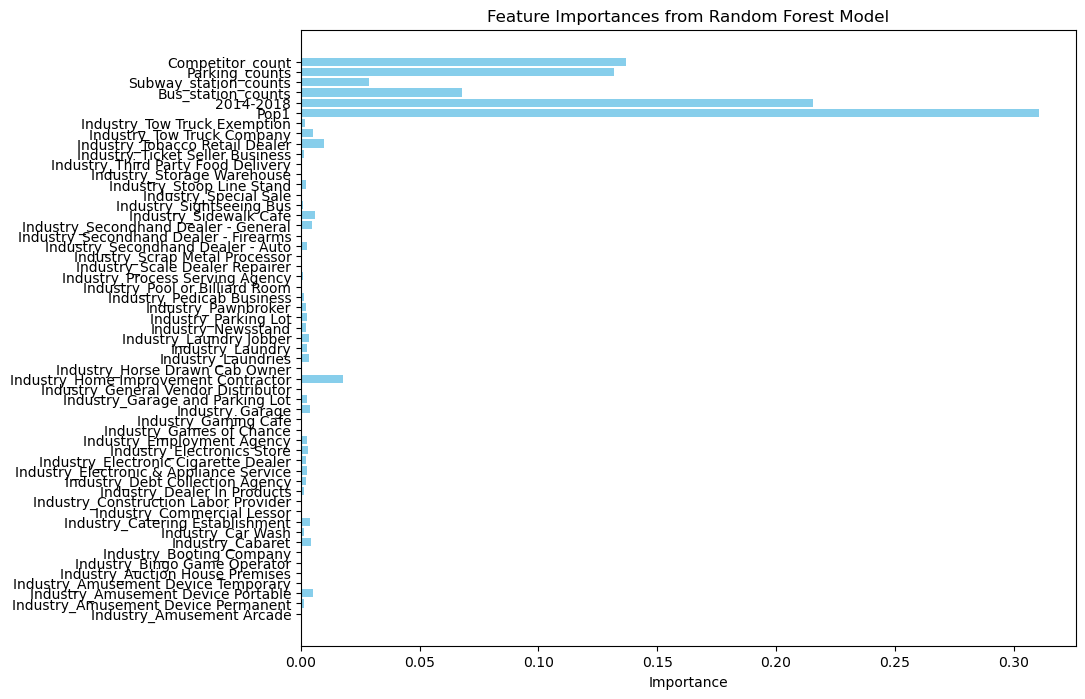

In [98]:
fig, ax = plt.subplots(figsize=(10, 8))
features = list(feature_importance_dict.keys())
importances = list(feature_importance_dict.values())
ax.barh(features, importances, color='skyblue')
ax.set_xlabel('Importance')
ax.set_title('Feature Importances from Random Forest Model')
plt.show()

In [ ]:
probabilities = rf.predict_proba(X_test)[:, 1]  # Assuming the positive class corresponds to "surviving"

# Define a threshold for classifying a prediction as 'survive'
threshold = 0.5
predictions = (probabilities >= threshold).astype(int)

# Calculate survival rate
survival_rate = np.mean(predictions) * 100
print(f"Estimated survival rate: {survival_rate:.2f}%")

Estimated survival rate: 99.96%


In [101]:
def predict_status(industry, location, population, bus_station_count, subway_station_count, parking_count, model, industry_encoder, location_encoder):
    import numpy as np
    import pandas as pd

    # Create a DataFrame for the input variables
    input_data = pd.DataFrame({
        'Industry': [industry],
        'Location': [location],
        'Population': [population],
        'Bus_station_counts': [bus_station_count],
        'Subway_station_counts': [subway_station_count],
        'Parking_counts': [parking_count]
    })

    # Encode categorical data
    input_data['Industry'] = industry_encoder.transform(input_data['Industry'])
    input_data['Location'] = location_encoder.transform(input_data['Location'])

    # Convert all data to float (model expects float)
    input_data = input_data.astype(float)

    # Predict the probability of Status = 1
    prediction_prob = model.predict_proba(input_data)[:, 1]  # index 1 for class '1'

    return prediction_prob[0]

# Example usage
# Assuming you have 'trained_rf_model', 'industry_encoder', and 'location_encoder' already set up
chance = predict_status('Restaurant', 'New York', 1000, 5, 3, 10, rf, input_data['Industry'], input_data['Location'])
print(f"The predicted chance of Status = 1 is {chance:.2f}")

NameError: name 'input_data' is not defined

In [ ]:
column_transformer = ColumnTransformer(
    transformers=[
        ('industry', OneHotEncoder(), ['Industry'])
    ],
    remainder='passthrough'
)

X = Business_model_data2.drop(['Status','DCA License Number','License Creation Date','Business Name_x','GeoID','geometry_x_left'], axis=1)
y = Business_model_data2['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=50)
rf.fit(X_train, y_train)

# Evaluate the model
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_dict = {name: importance for name, importance in zip(feature_names, importances)}
print("Feature Importances:", feature_importance_dict)

ValueError: could not convert string to float: 'Tobacco Retail Dealer'

In [ ]:
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

print(tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=["low", "medium", "high", "awful"],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\","))

AttributeError: 'csr_matrix' object has no attribute 'columns'